# AulaP8

- Finalizar implementação dos Splines Cúbicos
- Fórmulas de Quadratura Fechadas (Newton-Cotes)

***

## Splines Cúbicos

### Definição:

- Dada uma função $f$ definida em $[a,b]$ e um conjunto de nós $a=x_0<\dots<x_b=b$, diz-se um spline cúbico $S(x)$ interpolador de $f(x)$  a uma função que satisfaz:

     $S(x)$ é um polínomio cúbico, denotado por $S_j(x)$, em cada troço $[x_i,x_{i+1}],\quad$ $\forall i=0,1,\dots,n-1$.
    
    $S_i(x_i)=f(x_i)\quad$ e $\quad S_i(x_{i+1})=f(x_{i+1}),\quad$ $\forall i=0,1,\dots,n-1$.
    
    $S_{i+1}(x_{i+1})=f(x_{i+1}),\quad$ $\forall i=0,1,\dots,n-2$.
    
    $S'_{i+1}(x_{i+1})=S'_{i}(x_{i+1})\quad$ $\forall i=0,1,\dots,n-2$.
    
    $S''_{i+1}(x_{i+1})=S''_{i}(x_{i+1})\quad$ $\forall i=0,1,\dots,n-2$.
    
juntamente com umas das seguintes condições de fronteira:
    
   $S''(x_0)=S''(x_{n})=0\quad$ (fronteira **natural** ou livre)
   
   $S'(x_0)=f'(x_{0})\quad$ e  $\quad S'(x_n)=f'(x_{n})\quad$  (**condições na derivada**, fronteira **encastrada** *clamped*)

### Existência e unicidade

- Nas condições anteriores é garantida a existência de um spline cúbico **natural**.

- Em cada troço $[x_i,x_{i+1}]$ tem-se 

$$S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3\quad\forall i=0,1,\dots,n-1.$$ 




***
### Problema: 

- Como calcular os coeficientes $a_i, b_i, c_i, d_i$?.

 $$h_i=x_{i+1}-x_i\quad i=0,\dots, n-1$$

 $$a_i=f(x_i),\quad i=0,\dots, n$$

 $$b_i=\frac{a_{i+1}-a_i}{h_i}-\frac{h_i}{3}(2 c_i+c_{i+1}),\quad i=0,\dots, n-1$$
 
 $$d_i=\frac{c_{i+1}-c_{i}}{3h_i}, \quad i=0,\dots, n-1$$
 

- **$c_i,\quad  (i=0,\dots, n)$** resulta da resolução de um sistema tridiagonal de $(n+1)\times(n+1):$

 - **Condições naturais:**
 
 $$c_0=0,\quad c_n=0,$$
 
 $$h_{i-1}c_{i-1}+2(h_{i-1}+h_i)c_i+h_ic_{i+1}=\frac{3}{h_i}(a_{i+1}-a_i)-\frac{3}{h_{i-1}}(a_{i}-a_{i-1}),\quad i=1,\dots, n-1 $$

 - **Condições na derivada** 
 
 $$2h_0c_0+h_0c_1=\frac{3}{h_0}(a_{1}-a_0)- 3f'(x_0)$$
 
 $$h_{n-1}c_{n-1}+2h_{n-1}c_n=3f'(x_n) -\frac{3}{h_{n-1}}(a_{n}-a_{n-1}) $$
 
 $$h_{i-1}c_{i-1}+2(h_{i-1}+h_i)c_i+h_ic_{i+1}=\frac{3}{h_i}(a_{i+1}-a_i)-\frac{3}{h_{i-1}}(a_{i}-a_{i-1}),\quad i=1,\dots, n-1 $$

***
### Uma implementação possível: (Splines com condições Naturais)
 - A resolução do sistema em $c_i$ é feita recorrendo a *linalg.solve(A,b)*  

In [82]:
import numpy as np

class NaturalSpline:
    def __init__(self,data_x,data_y):
        self.x=data_x
        self.y=data_y
        self.N=len(data_x)-1
        assert len(self.x) != 0 and (len(self.x) == len(self.y)),\
        'x and y cannot be empty and must have the same length'
        self.h=self.x[1:self.N+1]-self.x[0:self.N]
        self.a=self.y
        self.b=np.zeros(self.N)
        self.c=np.zeros(self.N+1)
        self.d=np.zeros(self.N)
        self.Amat=np.zeros((self.N+1,self.N+1))
        self.SetAMatValues()
        self.Bvec=np.zeros(self.N+1)
        self.SetBvecValues()
        self.SolveSystem()
        self.Setbdvalues()
        
        
    def SetAMatValues(self):
        self.Amat[0][0]=1.0
        self.Amat[self.N][self.N]=1.0
        for i in range(1,self.N):
            self.Amat[i][i-1]=self.h[i-1]
            self.Amat[i][i]=2.0*(self.h[i-1]+self.h[i])
            self.Amat[i][i+1]=self.h[i]
        
        print('Triadiagonal Matrix done')
        return 'Triadiagonal Matrix done'
    
    
    def SetBvecValues(self):
        for i in range(1,self.N):
                self.Bvec[i]=3.0*(self.a[i+1]-self.a[i])/self.h[i]\
                -3.*(self.a[i]-self.a[i-1])/self.h[i-1] 
         
        print('Independent vector done')
        return 'Independent vector done'

    
    def SolveSystem(self): # Cenas dos próximos capítulos 
        self.c=np.linalg.solve(self.Amat,self.Bvec)
        
        print('System solved c values  done')
        return 'System solved c values  done'

        
    
    def Setbdvalues(self):
        self.b[0:self.N]=(self.a[1:self.N+1]-self.a[0:self.N])/self.h[0:self.N]\
                         -self.h[0:self.N]/3.0*(2*self.c[0:self.N]+self.c[1:self.N+1])
            
        self.d[0:self.N]=(self.c[1:self.N+1]-self.c[0:self.N])/(3.0*self.h[0:self.N])
        
        print('b and d values done')
        return 'b and d values done'
    
    
    def Si(self,i,varx):
        return self.a[i]+self.b[i]*(varx-self.x[i])+self.c[i]*(varx-self.x[i])**2+self.d[i]*(varx-self.x[i])**3
    
    
    def SplineFunction(self,varx):
        M=len(varx)
        assert self.x[0] == varx[0] and varx[M-1] == self.x[self.N], 'varx must be inside [x_0,x_n]'
        aux=np.zeros(M)
        for j in range(0,M-1): #Warning the Last point should be evaluated with the last xi
            for i in range(0,self.N):
                if self.x[i]<= varx[j] < self.x[i+1]:
                    aux[j]=self.Si(i,varx[j])
                    break
                    
        aux[M-1]=self.Si(self.N-1,varx[M-1])
        
        return aux
    

***



### Exercício de teste: Exemplo 1 (Burden, Faires, secção 3.14)

Considere $x_i=(0,1,2,3),$ $f(x)=e^x$.

- Apresente os valores $a_i$, $b_i$, $c_i$, $d_i$ bem como o sistema associado ao problema.
- Apresente o gráfico das funções $f(x)$, do Spline cúbico bem como dos nós de interpolação.


In [83]:
import matplotlib.pyplot as plt
x=np.array([0,1,2,3])
y=np.exp(x)

S=NaturalSpline(x,y)

Triadiagonal Matrix done
Independent vector done
System solved c values  done
b and d values done


x= [0 1 2 3]
ai= [  1.           2.71828183   7.3890561   20.08553692]
bi= [ 1.46599761  2.22285026  8.80976965]
ci= [-0.          0.75685264  5.83006675  0.        ]
di= [ 0.25228421  1.69107137 -1.94335558]
Amat= [[ 1.  0.  0.  0.]
 [ 1.  4.  1.  0.]
 [ 0.  1.  4.  1.]
 [ 0.  0.  0.  1.]]
Vecb= [  0.           8.85747733  24.07711966   0.        ]


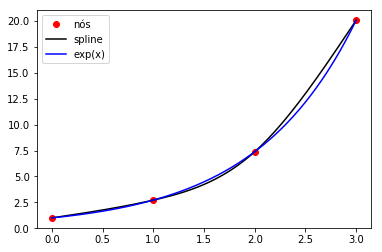

In [84]:
print('x=',S.x)
print('ai=',S.a)
print('bi=',S.b)
print('ci=',S.c)
print('di=',S.d)
print('Amat=',S.Amat)
print('Vecb=',S.Bvec)

xx=np.linspace(0,3,200)
yy=S.SplineFunction(xx)

plt.plot(x,y,'o',color='r',label='nós')
plt.plot(xx,yy,'-',color='k',label='spline')
plt.plot(xx,np.exp(xx),'-',color='blue',label='exp(x)')
plt.legend(loc='best')
plt.show()
plt.clf()

### Novamente a função de Runge, agora com splines cúbicos.

Triadiagonal Matrix done
Independent vector done
System solved c values  done
b and d values done


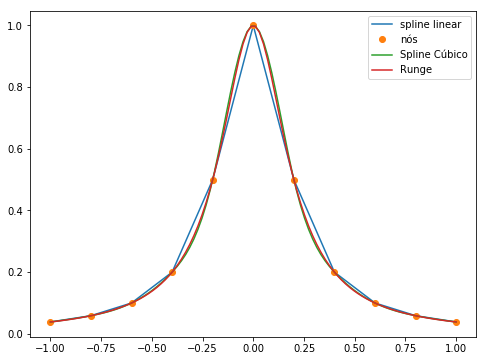

In [85]:
x=np.linspace(-1,1,11)
y=1./(1+25*x**2)

xx=np.linspace(-1.,1,100)
yy=1./(1+25*xx**2)

yl=NaturalSpline(x,y).SplineFunction(xx)
plt.figure(figsize=(8,6))
plt.plot(x,y,'-',label='spline linear')
plt.plot(x,y,'o',label='nós')
plt.plot(xx,yl,'-',label='Spline Cúbico')
plt.plot(xx,yy,'-',label='Runge')
plt.legend()
plt.show()
plt.clf()

***

***

## Integração Numérica

### Algumas Fórmulas de Newton-Cotes Simples com Erro 
 
**Notações**: Pontos igualmente espaçados $h=x_{i+1}-x_i$ e $(f_i=f(x_i))$, $(i=,1\dots, n)$:

1. Regra dos Trapézios (2 Pontos:  $x_0$, $x_1$) 
$$\int_{x_0}^{x_1} f(x)\, {\rm d}x = \frac{h}{2}(f_0+f_1)-\frac{h^3}{12}f''(\xi),\quad \xi\in[x_0,x_1]$$

- Regra de **Simpson** (3 Pontos:  $x_0$, $x_1$, $x_2$):   
$$\int_{x_0}^{x_2}f(x)\, {\rm d}x=\frac{h}{3}\left(f_0+4f_1+f_2\right)-\frac{h^5}{90}f^{(IV)}(\xi),\quad \xi\in[x_0,x_{2}]$$

- 3/8 (4 Pontos: $x_0$, $\dots$, $x_3$):
$$\int_{x_0}^{x_3}f(x)\, {\rm d}x=\frac{3h}{8}\left(f_0+3f_1+3f_2+f_3\right)-\frac{3h^5}{80}f^{(IV)}(\xi),\quad \xi\in[x_0,x_3]$$

- Regra de Boole (5 pontos, $x_0$, $\dots$, $x_4$ )
$$\int_{x_0}^{x_4}f(x)\, {\rm d}x=\frac{2h}{45}\left(7f_0+32f_1+12f_2+32f_3+7f_4\right)-\frac{8h^7}{945}f^{(VI)}(\xi),
\quad \xi\in[x_0,x_4]$$

- Regra dos 6 pontos ($x_0$, $\dots$, $x_5$)
$$\int_{x_0}^{x_5}f(x)\, {\rm d}x=\frac{5h}{288}\left(19f_0+75f_1+50f_2+50f_3+75f_4+19f_5\right)-\frac{275h^7}{12096}f^{(VI)}(\xi),\quad  \xi\in[x_0,x_5]$$

- Regra de Weddel (7 pontos, $x_0$, $\dots$, $x_6$)  
$$\int_{x_0}^{x_6}f(x)\, {\rm d}x=\frac{h}{140}\left(41f_0+216f_1+27f_2+272f_3+27f_4+216f_5+41f_6\right)-\frac{9h^9}{1400}f^{(VIII)}(\xi),\quad \xi\in[x_0,x_6]$$

### Exercício

- Seja $\displaystyle I=\int_{1.0}^{1.2}\frac{\sin(x)}{x}\, {\rm d}x$.

 1. Utilize a regra dos trapézios simples para aproximar o valor de $I$ e
apresente um majorante do erro de truncatura.
 -  Utilize a regra de Simpson simples para aproximar o valor de $I$ e
apresente um majorante do erro de truncatura.

**Sugestão**: Recorra ao gráfico das derivadas envolvidas nas expressões para o erro. 

In [2]:
#1. Regra dos Trapézios simples
import numpy as np
h=0.2
x=np.array([1.0,1.2])
f=np.sin(x)/x
print(f)
Trap=(h/2.0)*(f[0]+f[1])
print("Trap=%.5f" % Trap)

[0.84147098 0.77669924]
Trap=0.16182


In [3]:
# Cálculo da derivada recorrendo ao cálculo simbólico
# Majorante do erro
from math import sin, cos
from sympy import *
x=Symbol('x')
#Segunda derivada da função integranda
dfxx=diff(sin(x)/x,x,2)
print(dfxx)
dfx3=diff(sin(x)/x,x,3)
print(dfx3)
dfx4=diff(sin(x)/x,x,4)
print(dfx4)

(-sin(x) - 2*cos(x)/x + 2*sin(x)/x**2)/x
(-cos(x) + 3*sin(x)/x + 6*cos(x)/x**2 - 6*sin(x)/x**3)/x
(sin(x) + 4*cos(x)/x - 12*sin(x)/x**2 - 24*cos(x)/x**3 + 24*sin(x)/x**4)/x


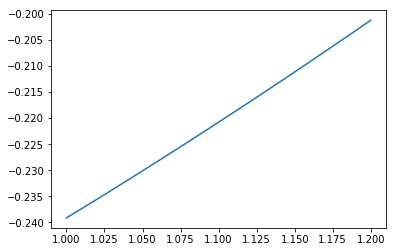

In [8]:
import matplotlib.pyplot as plt

def dfx2(x):
    return (-np.sin(x) - 2*np.cos(x)/x + 2*np.sin(x)/x**2)/x

xx=np.linspace(1,1.2,200)
yy=dfx2(xx)
plt.plot(xx,yy,'-')

In [12]:
max_dfxx=np.abs(dfx2(1.0))
print(round(max_dfxx+0.005,2))

0.24


In [13]:
MajErro=max_dfxx*h**3/12.0
print(MajErro)

0.0001594224179522554


### Resolução utilizando Simpson

In [14]:
B=1.2
A=1.0
h=(B-A)/2.0
x=np.array([A,A+h,B])
f=np.sin(x)/x
print(f)
Simpson=(h/3.0)*(f[0]+4*f[1]+f[2])
print("Simpson=%.5f" % Simpson)

[0.84147098 0.81018851 0.77669924]
Simpson=0.16196


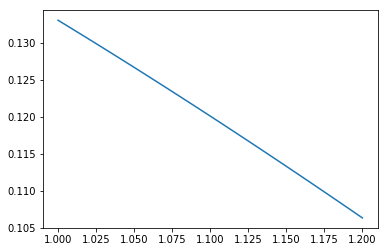

0.14
Majorante do Erro para Simpson Simples= 1.478629834887316e-08


In [19]:
#2. TRABALHO NA AULA
def dfx4(x): 
    return ((np.sin(x)+4*np.cos(x)/x-12*np.sin(x)/x**2-24.0*np.cos(x)/x**3+24*np.sin(x)/x**4)/x)

xx=np.linspace(1,1.2,100)
yy=dfx4(xx)
plt.plot(xx,yy,'-')
plt.show()

max_dfx4=np.abs(dfx4(1.0))
print(round(max_dfx4+0.005,2))
MajErro=max_dfx4*h**5/90.0
print("Majorante do Erro para Simpson Simples=", MajErro)

### Algumas Fórmulas de Newton-Cotes Compostas com Erro

**Notações**: Pontos igualmente espaçados $$h=x_{i+1}-x_i=\frac{x_n-x_0}{n}\quad\quad \text{e}\quad\quad f_i=f(x_i),\quad (i=,1\dots, n):$$

1. Regra dos Trapézios: 
$$\int_{x_0}^{x_n} f(x)\, {\rm d}x = \frac{h}{2}(f_0+2\sum_{i=1}^{n-1}f_i+f_n)-\frac{h^2(x_n-x_0)}{12}f''(\xi),\quad \xi\in[x_0,x_n]$$

- Regra de **Simpson** (n par):   
$$\int_{x_0}^{x_n}f(x)\, {\rm d}x=\frac{h}{3}\left(f_0+2\sum_{i=1}^{(n/2)-1}f_{2i}+4\sum_{i=1}^{(n/2)}f_{2i-1} + f_n\right)-\frac{h^4(x_n-x_0)}{180}f^{(IV)}(\xi),\quad \xi\in[x_0,x_{n}]$$


### Exercício
- Seja $$I=\int_0^{2}\sqrt{x}\, {\rm d}x=\frac{2}{3}x^{3/2}{\Big\vert}_{x=0}^{x=2}=\frac{2}{3}2^{3/2}=1.8856180831641267.$$

 1. Calcule uma aproximação do valor
de $I$ pela  regra dos trapézios simples assim como pela regra de
Simpson simples.
 - Calcule os erros exactos  cometidos nas aproximações anteriores.
 - Calcule uma aproximação do valor de $I$ recorrendo à regra de
  Simpson composta com $200$ subintervalos.
 - Calcule os erros exactos  cometidos nas aproximação anterior.


#### Trap

In [31]:
A=0
B=2
x=np.array([A,B])
h=B-A
f=np.sqrt(x)
Trap=h/2*(f[0]+f[1])
print('Trap=',Trap)
print('Erro=',abs(Trap-1.8856180831641267))

Trap= 1.4142135623730951
Erro= 0.47140452079103157


In [32]:
A=0
B=2
h=(B-A)/2.0
x=np.array([A,A+h,B])
f=np.sqrt(x)
Simpson=h/3.*(f[0]+4*f[1]+f[2])
print('Simpson=',Simpson)
print('Erro=',abs(Simpson-1.8856180831641267))

Simpson= 1.8047378541243648
Erro= 0.08088022903976189


In [37]:
# 3. e 4.
#Regra de Simpson Composta
import numpy as np
A=0.0
B=2.0
N=2000 # n. subintervalos (número par)
h=(B-A)/N
x=np.linspace(0.0,2.0,N+1)
f=np.sqrt(x)

#Soma Simpson simples de dois em dois subintervalos
def SumSimpson(N):
 assert (N%2==0), 'N must be a even number'
 SSimpson=0.0
 for i in range(0,N//2):
   SSimpson += h/3.0*(f[2*i]+4.0*f[2*i+1]+f[2*i+2])
 return SSimpson

SimpsonComposto=SumSimpson(N)
print("Simpson Composto=%.5f" % SimpsonComposto )

#Cálculo do Erro exacto
from math import sqrt
from sympy import *
X=Symbol('X')
I=integrate(sqrt(X),[X,0,2])
print("I=%.5f" % I)
Erro=abs(I-SimpsonComposto)
print("Erro exacto = %.15f" % Erro)

Simpson Composto=1.88562
I=1.88562
Erro exacto = 0.000002567283126


In [43]:
# 3. e 4.
#Regra de Trap Composta
import numpy as np
A=0.0
B=2.0
N=101 # n. subintervalos
h=(B-A)/N
x=np.linspace(0.0,2.0,N+1)
f=np.sqrt(x)

#Soma Simpson simples de dois em dois subintervalos
def SumTrap(N):
    STrap=0.0
    for i in range(0,N):
        STrap += h/2.0*(f[i]+f[i+1])
    return STrap

TrapComposto=SumTrap(N)
print("Trap Composto=%.5f" % TrapComposto )

#Cálculo do Erro exacto
from math import sqrt
from sympy import *
X=Symbol('X')
I=integrate(sqrt(X),[X,0,2])
print("I=%.5f" % I)
Erro=abs(I-TrapComposto)
print("Erro exacto = %.15f" % Erro)

Trap Composto=1.88505
I=1.88562
Erro exacto = 0.000567727262846


### Exercício:
- Considere $\displaystyle I=\int_{0}^{6}\frac{1}{1+x^2}\, {\rm d}x$.

 1. Calcule o valor exacto de $I$.
 - Utilize uma  regra de Newton-Cotes simples para aproximar o valor
  de $I$ dividindo o intervalo $[0,6]$ em $6$ sub-intervalos com a mesma
  amplitude.
 - Considere a partição do intervalo de integração $[a,b]$ da alínea
  anterior e  utilize a regra dos trapézios composta  para aproximar o valor de $I$.
 - Calcule os erros (exactos) obtidos nas alíneas b) e c) e
  comente. 

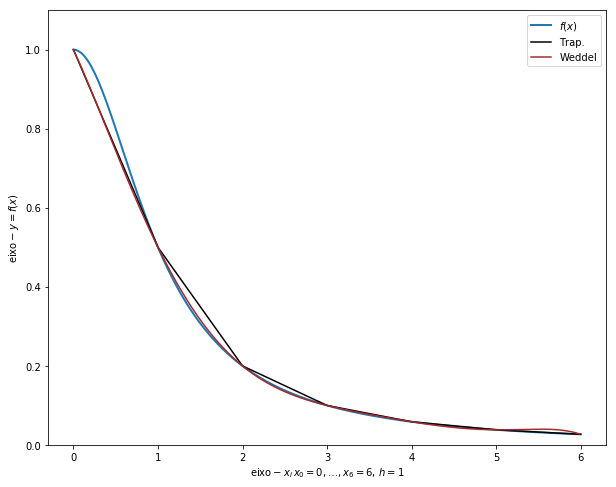

In [79]:
# 4.
from scipy import interpolate
import matplotlib.pyplot as plt

f= lambda x: (1/(1+x**2))

x = np.linspace(0, 6,1000)
plt.figure(figsize=(10, 8))
plt.plot(x,f(x),lw=2.0,label='$f(x)$')

xs=[0,1,2,3,4,5,6]
ys=[f(0),f(1),f(2),f(3),f(4),f(5),f(6)]

# Polinómio interpolador de grau 6 (6 sub-intervalos; 7 pontos)
p6f = interpolate.lagrange(xs, ys)
xp6 = np.arange(0,6, 0.01)
yp6 = p6f(xp6)

plt.plot(xs,ys, color='k', label='Trap.')
plt.plot(xp6,yp6, color='brown', label='Weddel')

#fill_between(xs,ys,0,color='grey')
#text(1.2,1.0,'$t_0$', fontsize=14)

plt.xlabel(r'$\mathrm{eixo-} x_i\, x_0=0,\dots,x_6=6,\,h=1$')
plt.ylabel(r'$\mathrm{eixo-} y=f(x)$')
plt.ylim(0.0,1.1)
#plt.ylim(0.0,0.07)
#plt.xlim(4.0,6.0)
plt.legend(loc='best')
plt.show()
plt.clf()

### Exercício
 
 -Pretende-se calcular $\displaystyle \ln 2=\int_1^2\frac{1}{x}\, {\rm d}x$.
 
Qual o número de sub-intervalos a considerar de  forma a que a regra de
Simpson composta conduza a valor aproximado de $\ln 2$ com erro de
truncatura inferior ou igual a $0.5\times 10^{-3}$.
